In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
anonymous_data = pd.read_csv('streamlit_data_anonymous.csv')
app_data = pd.read_csv('applications_with_industry .csv')

/var/folders/95/w1686fhn34zczpnrnccjxvgh0000gn/T/ipykernel_11098/3149043910.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  anonymous_data = pd.read_csv('streamlit_data_anonymous.csv')


In [3]:
apps_by_id_and_industry = app_data.groupby(['Employer Industry Name', 'Job ID']).size().reset_index(name="Applications for Job")

In [4]:
apps_by_id_and_industry = data.groupby(['Employer Industry Name', 'Job ID']).size().reset_index(name="Applications for Job")
# Get top 5 industries with the most unique Job IDs
top_industries = (
    apps_by_id_and_industry.groupby("Employer Industry Name")["Job ID"]
    .nunique()
    .nlargest(12)
    .index
)

# Filter dataset to include only these top industries
filtered_data = apps_by_id_and_industry[apps_by_id_and_industry["Employer Industry Name"].isin(top_industries)]

NameError: name 'data' is not defined

In [71]:
apps_by_id_and_industry = data.groupby(['Employer Industry Name', 'Job ID']).size().reset_index(name="Applications for Job")
# Get top 5 industries with the most unique Job IDs
top_industries = (
    apps_by_id_and_industry.groupby("Employer Industry Name")["Job ID"]
    .nunique()
    .nlargest(12)
    .index
)

# Filter dataset to include only these top industries
filtered_data = apps_by_id_and_industry[apps_by_id_and_industry["Employer Industry Name"].isin(top_industries)]
# Sort industries by median applications per job
industry_order = (
    filtered_data.groupby("Employer Industry Name")["Applications for Job"]
    .median()
    .sort_values()
    .index
)

In [72]:
anonymous_data]

/var/folders/95/w1686fhn34zczpnrnccjxvgh0000gn/T/ipykernel_11098/1338899802.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Applications for Job"] = np.clip(filtered_data["Applications for Job"], None, cap)


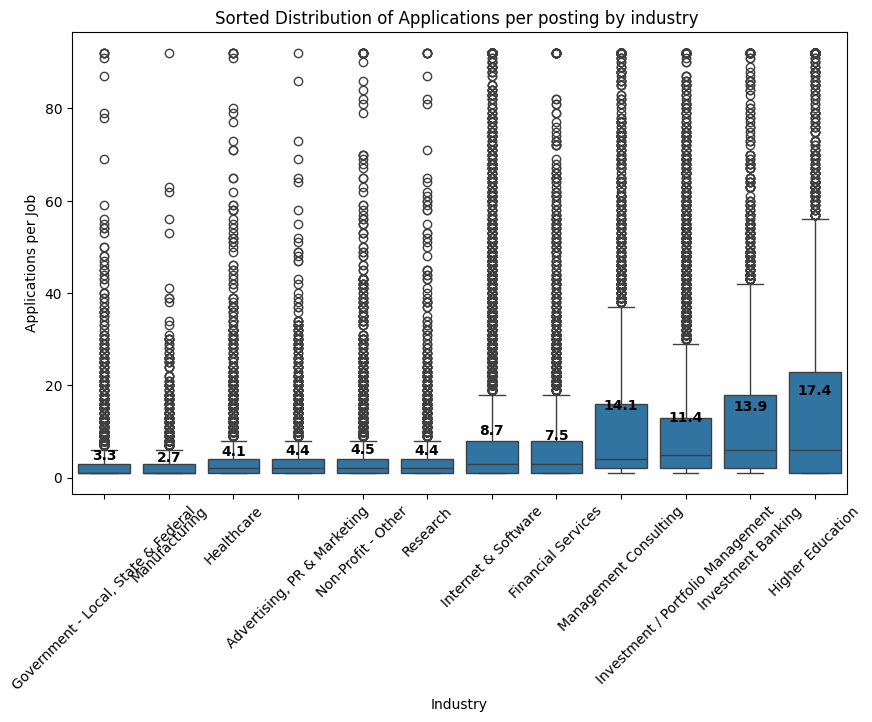

In [9]:


data = pd.read_csv('applications_with_industry .csv')

apps_by_id_and_industry = data.groupby(['Employer Industry Name', 'Job ID']).size().reset_index(name="Applications for Job")
# Get top 5 industries with the most unique Job IDs
top_industries = (
    apps_by_id_and_industry.groupby("Employer Industry Name")["Job ID"]
    .nunique()
    .nlargest(12)
    .index
)


# Filter dataset to include only these top industries
filtered_data = apps_by_id_and_industry[apps_by_id_and_industry["Employer Industry Name"].isin(top_industries)]
# Sort industries by median applications per job
industry_order = (
    filtered_data.groupby("Employer Industry Name")["Applications for Job"]
    .median()
    .sort_values()
    .index
)

# Cap outliers at the 95th percentile to reduce skew and see boxes
cap = np.percentile(filtered_data["Applications for Job"], 99)
filtered_data["Applications for Job"] = np.clip(filtered_data["Applications for Job"], None, cap)


# Compute medians
medians = filtered_data.groupby("Employer Industry Name")["Applications for Job"].mean()
# Plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=filtered_data, x="Employer Industry Name", y="Applications for Job", order=industry_order)

# Annotate medians
for i, industry in enumerate(industry_order):
    median_val = medians[industry]
    plt.text(i, median_val, f"{median_val:.1f}", ha='center', va='bottom', fontsize=10, fontweight="bold", color="black")

plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Applications per Job")
plt.title("Sorted Distribution of Applications per posting by industry ")

plt.show()

In [12]:
app_data

,Applicant (student) Auth Identifier,Postings Expiration Date Date,Job Title,Applications Created At Date,Employer Industry Name,Job Type Name,Job ID
0,zzz2bx,2024-04-06,Technology & Data Summer Internship Program,2024-03-02,Healthcare,Internship,8321849
1,zzz2bx,2024-04-19,AI Database & Research Report Intern (Part Tim...,2024-02-22,Internet & Software,Job,8360501
2,zzz2bx,2024-04-10,Intern for Growing Cybersecurity Company in No...,2024-03-02,Information Technology,Internship,8685407
3,zzz2bx,2024-03-13,Data Science Intern,2024-02-22,Scientific and Technical Consulting,Internship,8242731
4,zzz2bx,2024-02-29,Python and/or Java Instructor,2024-02-06,K-12 Education,Job,8505321
...,...,...,...,...,...,...,...
669420,NaN,2022-05-12,Software Development Intern,2022-04-14,Healthcare,Internship,6312159
669421,NaN,2022-04-05,Business Analyst Intern,2021-12-22,Biotech & Life Sciences,Internship,5531475
669422,NaN,2022-07-01,Software Developer Internship,2022-05-26,Higher Education,Internship,6512280
669423,NaN,2022-04-28,Software Development Intern,2022-04-14,Internet & Software,Internship,6240333


In [14]:
app_data[app_data['Employer Industry Name']=='Investment Banking'].groupby('Job ID').size().mean()

np.float64(14.538800406641815)